In [6]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
dataset = pd.read_csv('/Users/ppp/Downloads/Weather.csv')
dataset.describe()


,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'MaxTemp')

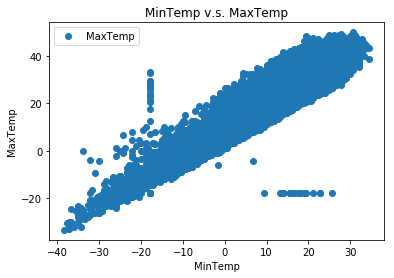

In [8]:
dataset.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title('MinTemp v.s. MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


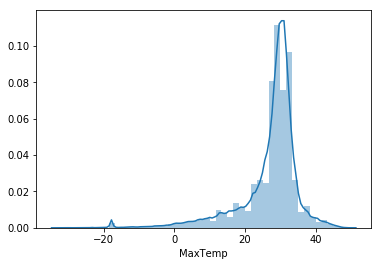

In [9]:
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

The Average Maximum Temperature is Between 25 to 35 
seabornInstance.distplot  --The distplot() shows the histogram distribution of data for a single column. And the line represents the kernel density estimation.

In [5]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
print(X)

[[22.22222222]
 [21.66666667]
 [22.22222222]
 ...
 [18.33333333]
 [18.33333333]
 [17.22222222]]


Split 80% of the data to the training set while 20% of the data to the test set

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state =0)

Training our algorithm by using LinearRegression

In [7]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


The linear regression model basically finds the best value of the intercept and slope which results in a line that best find the data

The intercept is 10.66 and scope is 0.92, that mean for every one unit of change in Min temperature, the change in the Maximum Temperature is about 0.92%

In [8]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df.tail( ))

          Actual  Predicted
23803  32.777778  32.136451
23804  32.222222  29.068651
23805  31.111111  32.647751
23806  31.111111  30.602551
23807  36.666667  31.625151


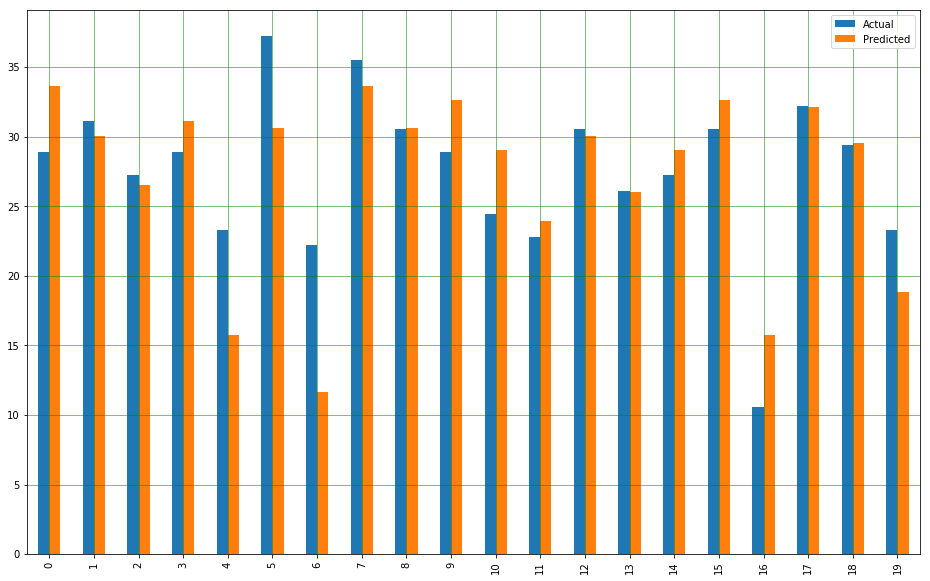

In [9]:
df1 = df.head(20)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

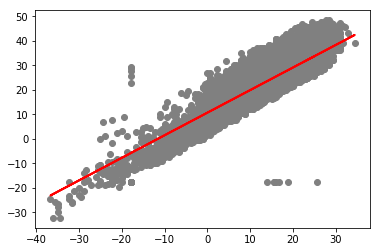

In [10]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

The straight line in the above graph shows our algorithm is correct.

Then to evaluate the performance of the algorithm.

In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1993291783785285
Mean Squared Error: 17.631568097568444
Root Mean Squared Error: 4.198996082109204


## Multiple Linear Regression
Linear regression involving multiple variables.

In [27]:
#datasetRedWine = pd.read_csv('/Users/ppp/Downloads/winequality.csv')
print(dataset.tail())

          STA        Date Precip  WindGustSpd    MaxTemp    MinTemp  \
119035  82506  1945-12-27      0          NaN  28.333333  18.333333   
119036  82506  1945-12-28  9.906          NaN  29.444444  18.333333   
119037  82506  1945-12-29      0          NaN  28.333333  18.333333   
119038  82506  1945-12-30      0          NaN  28.333333  18.333333   
119039  82506  1945-12-31      0          NaN  29.444444  17.222222   

         MeanTemp Snowfall PoorWeather  YR ...   FB  FTI ITH  PGT  TSHDSBRSGF  \
119035  23.333333        0         NaN  45 ...  NaN  NaN NaN  NaN         NaN   
119036  23.888889        0           1  45 ...  NaN  NaN NaN  NaN           1   
119037  23.333333        0           1  45 ...  NaN  NaN NaN  NaN           1   
119038  23.333333        0         NaN  45 ...  NaN  NaN NaN  NaN         NaN   
119039  23.333333        0         NaN  45 ...  NaN  NaN NaN  NaN         NaN   

        SD3  RHX  RHN RVG  WTE  
119035  NaN  NaN  NaN NaN  NaN  
119036  NaN  NaN  Na

Clean data
find which are the columns the contains NaN,
remove all the null values 

In [57]:
dataset.isnull().any()
dataset = dataset.fillna(method='ffill')

divide the data into “attributes” and “labels”. X variable contains all the attributes/features and y variable contains labels.

In [62]:
X = dataset[['MaxTemp','MinTemp']].values
y = dataset['MeanTemp'].values

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


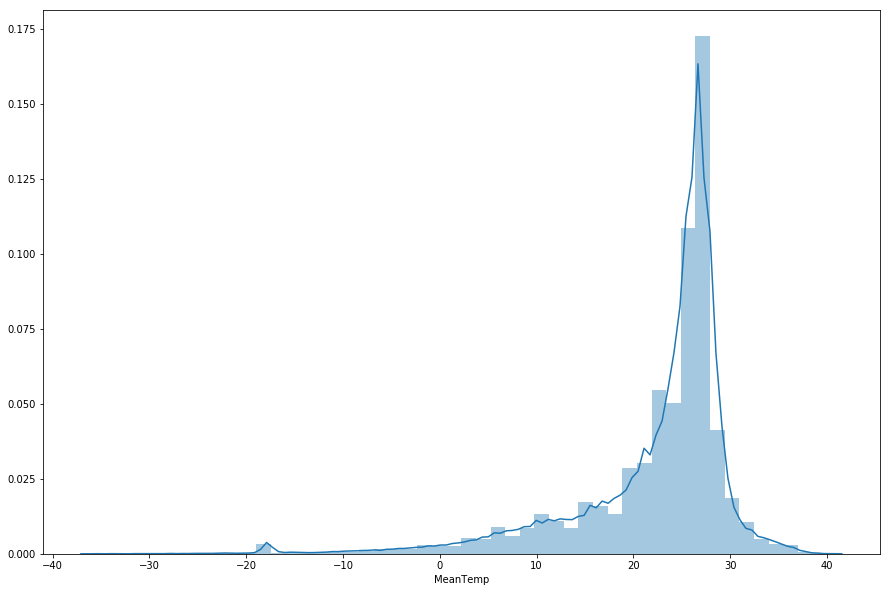

In [63]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MeanTemp'])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
print(df1)

       Actual  Predicted
0   27.222222  26.935875
1   26.111111  26.115067
2   22.222222  22.217685
3   25.555556  25.550473
4   14.444444  14.441178
5   29.444444  29.468722
6   11.666667  11.665159
7   30.000000  30.292138
8   26.111111  26.112459
9   26.666667  26.381714
10  22.222222  22.204643
11  18.888889  18.594775
12  25.555556  25.835378
13  21.111111  21.381227
14  23.333333  23.603086
15  27.222222  27.220780
16   7.777778   8.008341
17  27.777778  27.782765
18  25.000000  24.998921
19  16.111111  16.103660
20  23.333333  23.618736
21  32.777778  32.822376
22  24.444444  24.157247
23  28.888889  28.896303
24  22.222222  21.958862


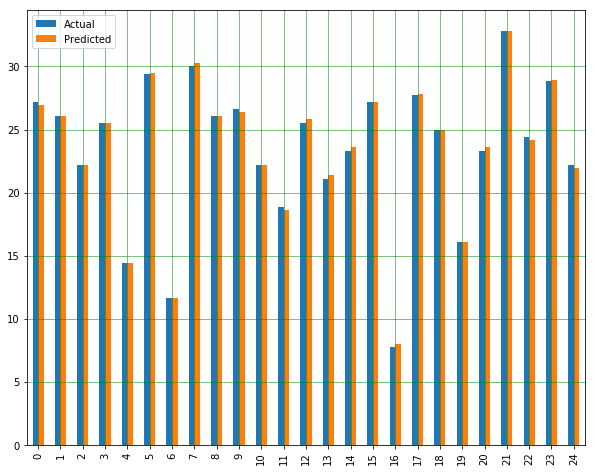

In [70]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16245041400783403
Mean Squared Error: 0.24656329584314196
Root Mean Squared Error: 0.49655140302202544
